In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_excel(r'C:\Users\ANKIT\Desktop\Internship_Project\telcom_data.xlsx')

In [3]:
data

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,2019-04-29 07:28:42,451.0,2019-04-30 06:02:33,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7349883264234609664,2019-04-29 07:28:42,483.0,2019-04-30 10:41:33,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,13114483573367300096,2019-04-29 07:28:43,283.0,2019-04-30 10:46:12,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,13114483573367300096,2019-04-29 07:28:43,696.0,2019-04-30 10:40:34,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [6]:
#Handle missing values
data.fillna(data.mean(), inplace=True)

C:\Users\ANKIT\AppData\Local\Temp\ipykernel_9688\1908214512.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data.fillna(data.mean(), inplace=True)
C:\Users\ANKIT\AppData\Local\Temp\ipykernel_9688\1908214512.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean(), inplace=True)


In [7]:
data['session_frequency'] = data.groupby(by=['MSISDN/Number'])['Dur. (ms)'].transform('count')

In [8]:
data['session_duration'] = data['Dur. (ms)']

In [9]:
data['total_traffic'] = data['Total DL (Bytes)'] + data['Total UL (Bytes)']

In [12]:
# Calculate average TCP retransmission
# Group the data by 'MSISDN/Number', and calculate the mean of 'TCP DL Retrans. Vol (Bytes)' and 'TCP UL Retrans. Vol (Bytes)'
# Then, take the overall mean of the two mean values for each group
avg_tcp_retransmission = data.groupby('MSISDN/Number')[['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)']].mean().mean(axis=1)

# Fill missing values in the 'avg_tcp_retransmission' with the overall mean
# This will help handle any NaN (Not a Number) values in the resulting Series
avg_tcp_retransmission.fillna(avg_tcp_retransmission.mean(), inplace=True)

# Calculate average RTT (Round Trip Time)
# Group the data by 'MSISDN/Number', and calculate the mean of 'Avg RTT DL (ms)' and 'Avg RTT UL (ms)'
# Then, take the overall mean of the two mean values for each group
avg_rtt = data.groupby('MSISDN/Number')[['Avg RTT DL (ms)', 'Avg RTT UL (ms)']].mean().mean(axis=1)

# Fill missing values in the 'avg_rtt' with the overall mean
avg_rtt.fillna(avg_rtt.mean(), inplace=True)

#Replace missing values in 'Handset Type' with the mode (most common value) for each 'MSISDN/Number'
# Group the data by 'MSISDN/Number', and find the mode (most common value) of 'Handset Type' for each group
# If there are multiple modes, choose the first one; otherwise, set it to None
handset_mode = data.groupby('MSISDN/Number')['Handset Type'].agg(lambda x: x.mode().values[0] if len(x.mode()) > 0 else None)

#  Calculate average throughput
# Group the data by 'MSISDN/Number', and calculate the mean of 'Avg Bearer TP DL (kbps)' and 'Avg Bearer TP UL (kbps)'
# Then, take the overall mean of the two mean values for each group
avg_throughput = data.groupby('MSISDN/Number')[['Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']].mean().mean(axis=1)

# Fill missing values in the 'avg_throughput' with the overall mean
avg_throughput.fillna(avg_throughput.mean(), inplace=True)

#Create a new DataFrame with aggregated information
#Combine all the calculated averages and the 'Handset_Type' mode into a new DataFrame
aggregated_data = pd.DataFrame({
    'Avg_TCP_Retransmission': avg_tcp_retransmission,
    'Avg_RTT': avg_rtt,
    'Handset_Type': handset_mode,
    'Avg_Throughput': avg_throughput
 })
# Step 7: Reset the index to make 'MSISDN/Number' a column instead of the index
# This step is done to bring the 'MSISDN/Number' back as a regular column in the DataFrame
aggregated_data.reset_index(inplace=True)
    
# Step 8: Display the aggregated data
# Print the final DataFrame that contains the aggregated information
print(aggregated_data)

        MSISDN/Number  Avg_TCP_Retransmission     Avg_RTT  \
0        3.360100e+10            1.078479e+07   23.000000   
1        3.360100e+10            1.078479e+07   15.500000   
2        3.360100e+10            1.078479e+07   63.729294   
3        3.360101e+10            3.803623e+05   42.000000   
4        3.360101e+10            7.735101e+06   29.750000   
...               ...                     ...         ...   
106852   3.379000e+10            1.078479e+07   20.000000   
106853   4.188282e+10            8.491987e+06  154.561991   
106854   3.197021e+12            1.078479e+07   63.729294   
106855   3.370000e+14            1.078479e+07   63.729294   
106856   8.823971e+14            1.078479e+07   63.729294   

                            Handset_Type  Avg_Throughput  
0         Huawei P20 Lite Huawei Nova 3E       38.000000  
1                 Apple iPhone 7 (A1778)       49.500000  
2                              undefined       48.500000  
3                Apple iPhone 5

In [13]:
user_data = aggregated_data[['Avg_TCP_Retransmission', 'Avg_RTT', 'Avg_Throughput']].values

In [14]:
import warnings
warnings.filterwarnings('ignore')

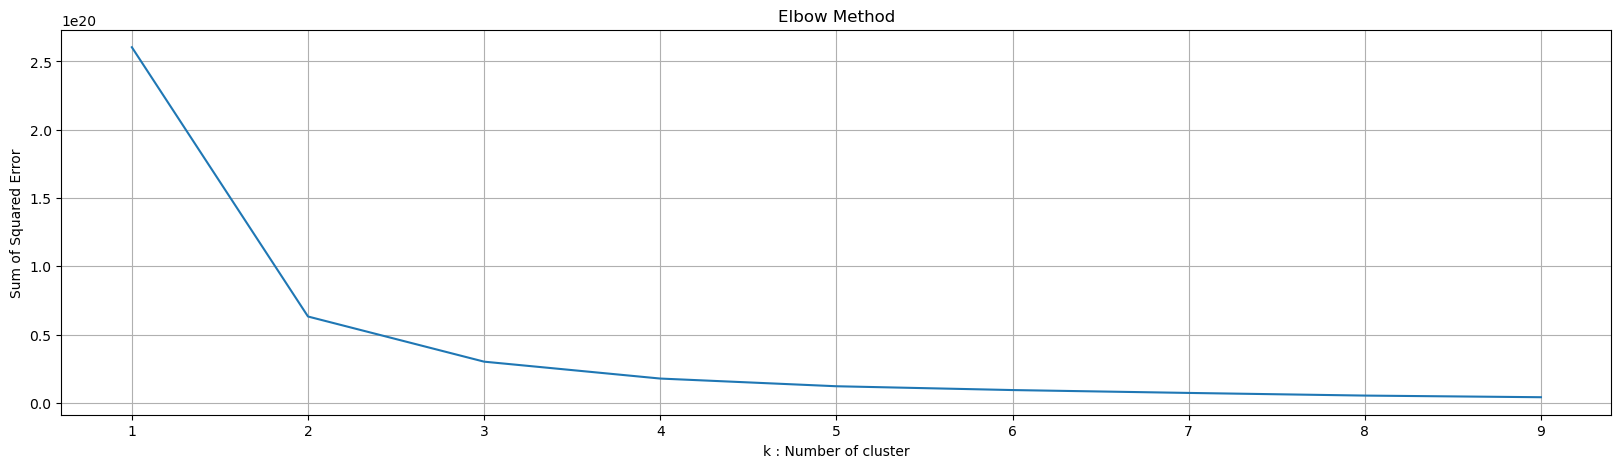

In [17]:
sse = {};
kmax = 10
fig = plt.subplots(figsize = (20,5))

# Elbow Method
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(user_data)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
sns.lineplot(x = list(sse.keys()), y = list(sse.values()));
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")
plt.grid()

In [18]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 2,
               max_iter = 1000)
model.fit(user_data)

KMeans(max_iter=1000, n_clusters=2)

In [20]:
cluster = model.cluster_centers_
cluster

array([[8.72428534e+06, 6.73729348e+01, 6.53061813e+03],
       [1.09614980e+09, 7.19334331e+01, 3.58607516e+04]])

In [21]:
labels = model.labels_
labels
centroids=np.array(cluster)
centroids

array([[8.72428534e+06, 6.73729348e+01, 6.53061813e+03],
       [1.09614980e+09, 7.19334331e+01, 3.58607516e+04]])

In [22]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import MinMaxScaler
distances = euclidean_distances(user_data, centroids)

less_engaged_cluster_index = 0

engagement_scores = distances[:, less_engaged_cluster_index]

mms = MinMaxScaler()
engagement_scores = mms.fit_transform(engagement_scores.reshape(-1, 1))

aggregated_data['Engagement Score'] = engagement_scores


aggregated_data

,MSISDN/Number,Avg_TCP_Retransmission,Avg_RTT,Handset_Type,Avg_Throughput,Engagement Score
0,3.360100e+10,1.078479e+07,23.000000,Huawei P20 Lite Huawei Nova 3E,38.000000,0.000961
1,3.360100e+10,1.078479e+07,15.500000,Apple iPhone 7 (A1778),49.500000,0.000961
2,3.360100e+10,1.078479e+07,63.729294,undefined,48.500000,0.000961
3,3.360101e+10,3.803623e+05,42.000000,Apple iPhone 5S (A1457),124.000000,0.003895
4,3.360101e+10,7.735101e+06,29.750000,Apple iPhone Se (A1723),14211.000000,0.000461
...,...,...,...,...,...,...
106852,3.379000e+10,1.078479e+07,20.000000,Apple iPhone 8 Plus (A1897),58.000000,0.000961
106853,4.188282e+10,8.491987e+06,154.561991,undefined,8479.471611,0.000108
106854,3.197021e+12,1.078479e+07,63.729294,Quectel Wireless. Quectel Ec25-E,0.500000,0.000961
106855,3.370000e+14,1.078479e+07,63.729294,Huawei B525S-23A,16.500000,0.000961


In [24]:
cluster_centroids = centroids

distances = euclidean_distances(user_data, cluster_centroids)

worst_experience_cluster_index = cluster_centroids.shape[0] - 1

experience_scores = distances[:, worst_experience_cluster_index]

mms = MinMaxScaler()
experience_scores = mms.fit_transform(experience_scores.reshape(-1, 1))

aggregated_data['Experience Score'] = experience_scores

aggregated_data

,MSISDN/Number,Avg_TCP_Retransmission,Avg_RTT,Handset_Type,Avg_Throughput,Engagement Score,Experience Score
0,3.360100e+10,1.078479e+07,23.000000,Huawei P20 Lite Huawei Nova 3E,38.000000,0.000961,0.990116
1,3.360100e+10,1.078479e+07,15.500000,Apple iPhone 7 (A1778),49.500000,0.000961,0.990116
2,3.360100e+10,1.078479e+07,63.729294,undefined,48.500000,0.000961,0.990116
3,3.360101e+10,3.803623e+05,42.000000,Apple iPhone 5S (A1457),124.000000,0.003895,0.999651
4,3.360101e+10,7.735101e+06,29.750000,Apple iPhone Se (A1723),14211.000000,0.000461,0.992911
...,...,...,...,...,...,...,...
106852,3.379000e+10,1.078479e+07,20.000000,Apple iPhone 8 Plus (A1897),58.000000,0.000961,0.990116
106853,4.188282e+10,8.491987e+06,154.561991,undefined,8479.471611,0.000108,0.992217
106854,3.197021e+12,1.078479e+07,63.729294,Quectel Wireless. Quectel Ec25-E,0.500000,0.000961,0.990116
106855,3.370000e+14,1.078479e+07,63.729294,Huawei B525S-23A,16.500000,0.000961,0.990116


In [25]:
aggregated_data['satisfaction_score'] = (aggregated_data['Engagement Score'] + aggregated_data['Experience Score']) / 2
top_10_satisfied_customers = aggregated_data.nlargest(10, 'satisfaction_score')

# Task 4.2 - Reporting Top 10 Satisfied Customers.

In [26]:
top_10_satisfied_customers

,MSISDN/Number,Avg_TCP_Retransmission,Avg_RTT,Handset_Type,Avg_Throughput,Engagement Score,Experience Score,satisfaction_score
85785,3.369858e+10,2.150739e+09,243.0,Huawei B528S-23A,15883.0,1.000000,0.961909,0.980954
32273,3.365871e+10,2.144060e+09,40.5,Huawei B528S-23A,47091.0,0.996882,0.955788,0.976335
58026,3.366491e+10,2.134324e+09,226.5,Huawei B528S-23A,27604.5,0.992337,0.946864,0.969600
31942,3.365863e+10,2.127330e+09,44.0,Huawei B528S-23A,58566.5,0.989072,0.940454,0.964763
62049,3.366613e+10,2.105629e+09,104.0,Huawei B528S-23A,29800.0,0.978940,0.920565,0.949753
70079,3.366877e+10,2.083297e+09,86.0,Huawei B528S-23A,36136.0,0.968515,0.900098,0.934307
43629,3.366131e+10,2.068969e+09,40.5,Huawei B528S-23A,52501.5,0.961826,0.886966,0.924396
48341,3.366240e+10,2.058902e+09,32.0,Huawei B528S-23A,33839.0,0.957126,0.877740,0.917433
64113,3.366682e+10,1.984060e+09,78.5,Huawei B528S-23A,19659.5,0.922186,0.809146,0.865666
98211,3.376264e+10,1.893435e+09,34.0,Huawei B528S-23A,30143.5,0.879878,0.726087,0.802982


# Task 4.3 - Building a Regression Model for Satisfaction Prediction.

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X = aggregated_data[['Engagement Score', 'Experience Score']]
y = aggregated_data['satisfaction_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the regression model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Predict satisfaction scores for the test set
y_pred = regression_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

In [28]:
mse

1.8930431496265933e-31

In [30]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 1.0


# Task 4.4 - Running k-means on Engagement and Experience Scores.

In [31]:
scores = aggregated_data[['Engagement Score', 'Experience Score']]
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit_predict(scores)
aggregated_data['score_cluster'] = clusters

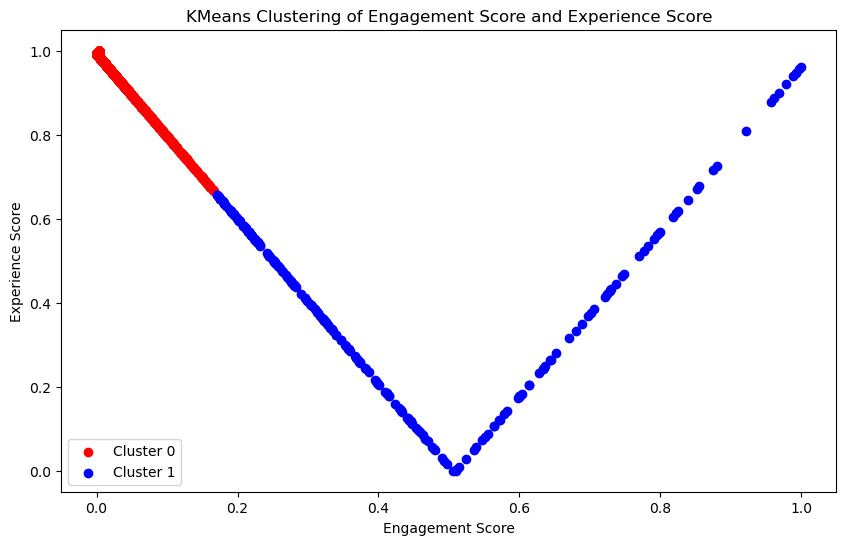

In [32]:
# Perform KMeans clustering on the 'Engagement Score' and 'Experience Score'
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit_predict(scores)

# Add the 'score_cluster' column to 'aggregated_data' to store the cluster information
aggregated_data['score_cluster'] = clusters

# Plotting the 'Engagement Score' and 'Experience Score' with the corresponding cluster using a scatter plot
plt.figure(figsize=(10, 6))  # Setting the figure size to make the plot more visible

# Scatter plot for cluster 0 (first cluster)
plt.scatter(aggregated_data[aggregated_data['score_cluster'] == 0]['Engagement Score'],
            aggregated_data[aggregated_data['score_cluster'] == 0]['Experience Score'],
            color='red', label='Cluster 0')

# Scatter plot for cluster 1 (second cluster)
plt.scatter(aggregated_data[aggregated_data['score_cluster'] == 1]['Engagement Score'],
            aggregated_data[aggregated_data['score_cluster'] == 1]['Experience Score'],
            color='blue', label='Cluster 1')

# Adding labels and title for the scatter plot
plt.xlabel('Engagement Score')
plt.ylabel('Experience Score')
plt.title('KMeans Clustering of Engagement Score and Experience Score')

# Adding legend to differentiate between clusters
plt.legend()

# Display the scatter plot
plt.show()

# Task 4.5 - Aggregating Average Satisfaction and Experience Scores per Cluster.

In [33]:
cluster_agg = aggregated_data.groupby('score_cluster').agg({
    'satisfaction_score': 'mean',
    'Experience Score': 'mean'
})

In [34]:
cluster_agg

,satisfaction_score,Experience Score
score_cluster,,
0,0.497259,0.992270
1,0.410716,0.400894


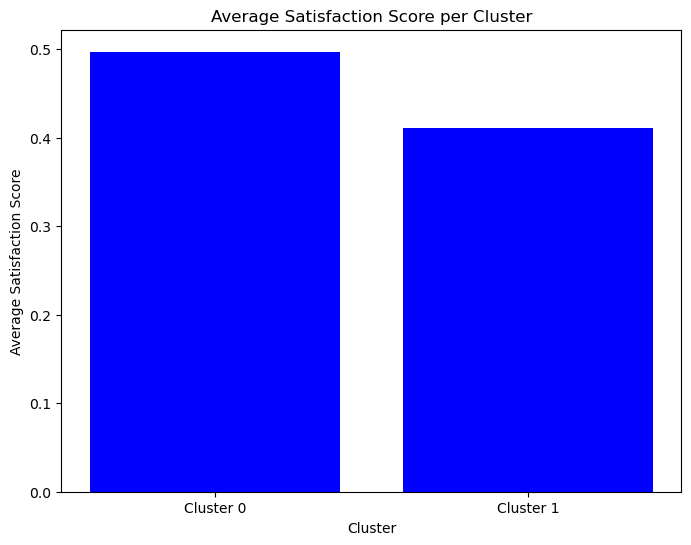

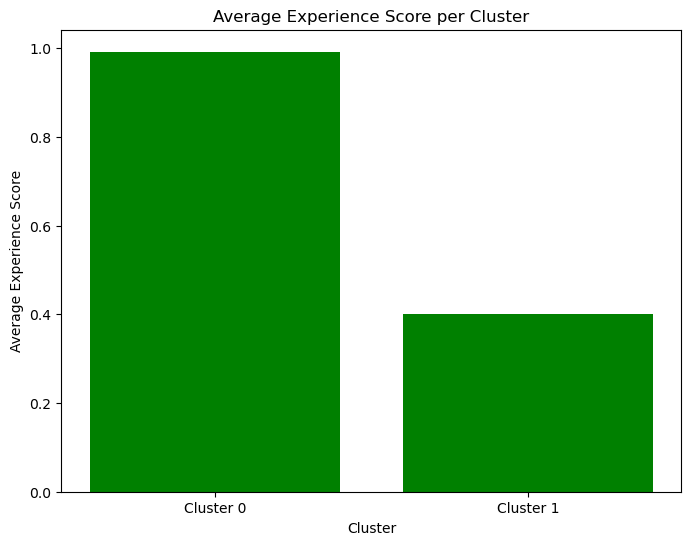

In [35]:
# Define the cluster labels and average scores
cluster_labels = ['Cluster 0', 'Cluster 1']
avg_satisfaction_scores = cluster_agg['satisfaction_score']
avg_experience_scores =cluster_agg['Experience Score']

# Plot the average satisfaction scores
plt.figure(figsize=(8, 6))
plt.bar(cluster_labels, avg_satisfaction_scores, color='blue')
plt.xlabel('Cluster')
plt.ylabel('Average Satisfaction Score')
plt.title('Average Satisfaction Score per Cluster')

# Display the plot
plt.show()

# Plot the average experience scores
plt.figure(figsize=(8, 6))
plt.bar(cluster_labels, avg_experience_scores, color='green')
plt.xlabel('Cluster')
plt.ylabel('Average Experience Score')
plt.title('Average Experience Score per Cluster')

# Display the plot
plt.show()